In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training8.csv")
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,0.006206,0.006724,0.874061,0.000724,0.000517,0.207189,0.207189,0.020274,0.073028,0.0,...,0.000103,0,0.000000,0.0,0.0,0.0,0.000103,0.0,0,208500
1,0.001873,0.007492,0.899023,0.000562,0.000749,0.185049,0.185049,0.000000,0.091588,0.0,...,0.000094,0,0.000000,0.0,0.0,0.0,0.000094,0.0,0,181500
2,0.004914,0.005569,0.921408,0.000573,0.000410,0.163888,0.163970,0.013268,0.039805,0.0,...,0.000082,0,0.000000,0.0,0.0,0.0,0.000082,0.0,0,223500
3,0.006596,0.005654,0.899887,0.000660,0.000471,0.180449,0.185631,0.000000,0.020353,0.0,...,0.000094,0,0.000094,0.0,0.0,0.0,0.000000,0.0,0,140000
4,0.003961,0.005545,0.941326,0.000528,0.000330,0.132023,0.132023,0.023104,0.043238,0.0,...,0.000066,0,0.000000,0.0,0.0,0.0,0.000066,0.0,0,250000


In [3]:
corr=df.corr()

In [4]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
SalePrice,-0.187647,-0.150612,0.228492,0.030433,-0.394900,-0.393929,-0.401973,0.286089,0.209935,-0.056868,...,-0.423426,NaN,-0.139545,-0.051458,-0.030231,-0.049619,-0.338044,0.273673,NaN,1.000000
BsmtQual_Ex,-0.019162,0.029625,-0.004661,0.153260,-0.114671,-0.048726,-0.053646,0.226263,0.196354,-0.036025,...,-0.206695,NaN,-0.045265,-0.014686,-0.024430,-0.031567,-0.170257,0.307506,NaN,0.451608
KitchenQual_Ex,-0.008671,-0.015889,-0.001595,0.123222,-0.057121,-0.059439,-0.059953,0.120338,0.146168,-0.038462,...,-0.133922,NaN,0.049378,-0.013164,-0.021899,-0.028297,-0.165153,0.190471,NaN,0.409421
ExterQual_Ex,-0.043465,-0.002081,0.037454,0.084736,-0.084612,-0.086550,-0.088374,0.216657,0.111300,-0.034108,...,-0.192771,NaN,-0.046799,-0.009523,-0.015841,-0.020469,-0.160383,0.240313,NaN,0.404878
Neighborhood_NridgHt,0.079830,0.011417,-0.060334,0.180990,-0.053661,0.014349,0.010042,0.207970,0.098621,-0.051179,...,-0.091817,NaN,-0.056647,-0.011527,-0.019174,-0.024776,-0.048898,0.173688,NaN,0.313647
ExterQual_Gd,0.244144,0.127291,-0.271118,0.500648,0.062334,0.222969,0.213852,0.138024,0.093554,-0.080887,...,0.020290,NaN,-0.045175,-0.033648,-0.050994,-0.038926,0.054771,0.242718,NaN,0.307234
Foundation_PConc,0.294030,0.138138,-0.309576,0.539514,0.079992,0.286325,0.275757,0.187246,0.134822,-0.131092,...,0.067493,NaN,-0.068619,0.020954,-0.042032,-0.034403,0.078990,0.286249,NaN,0.306703
Fireplaces,0.063250,0.047981,-0.071323,0.203926,-0.014197,0.007862,0.003995,0.146287,0.132208,-0.002821,...,-0.008842,NaN,-0.092457,-0.046835,-0.022880,-0.004424,0.044421,0.036288,NaN,0.296400
Neighborhood_NoRidge,-0.053253,0.002040,0.061684,-0.005377,-0.120317,-0.107713,-0.110160,0.197925,0.082584,-0.044654,...,-0.039500,NaN,-0.001196,-0.008586,-0.014284,-0.018456,-0.044507,-0.047499,NaN,0.292830
MasVnrArea,0.226652,0.020592,-0.232376,0.282195,0.032106,0.138909,0.130019,1.000000,0.209548,-0.087016,...,0.046362,NaN,-0.007775,-0.012815,0.015781,0.050269,0.038061,0.075631,NaN,0.286089


In [5]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [6]:
model=DecisionTreeRegressor(criterion='absolute_error',splitter='random',max_features='log2')

In [7]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'BsmtQual_Ex', 'KitchenQual_Ex', 'ExterQual_Ex',
       'Neighborhood_NridgHt', 'ExterQual_Gd', 'Foundation_PConc',
       'Fireplaces', 'Neighborhood_NoRidge', 'MasVnrArea'],
      dtype='object')

In [9]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,36629.087329,58563.938085,0.552857
1,11,35399.926370,53973.852582,0.620202
2,12,38042.958904,59224.987184,0.542705
3,13,39927.027397,60645.011531,0.520514
4,14,37615.907534,59447.399326,0.539264
...,...,...,...,...
105,115,42527.660959,66073.096753,0.430839
106,116,38194.955479,61125.504650,0.512885
107,117,42545.996575,68471.024250,0.388777
108,118,37151.082192,62337.391953,0.493379


In [10]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
103,113,33657.688356,50025.397372,0.673737
43,53,34601.393836,49831.558939,0.676261
101,111,34678.006849,55124.120618,0.603841
23,33,34860.294521,51260.804472,0.657424
49,59,35160.339041,54240.928981,0.616434
...,...,...,...,...
107,117,42545.996575,68471.024250,0.388777
21,31,42685.907534,68811.997320,0.382674
85,95,43436.825342,70085.314642,0.359616
6,16,43852.426370,75796.079333,0.251004


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15276\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15276\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


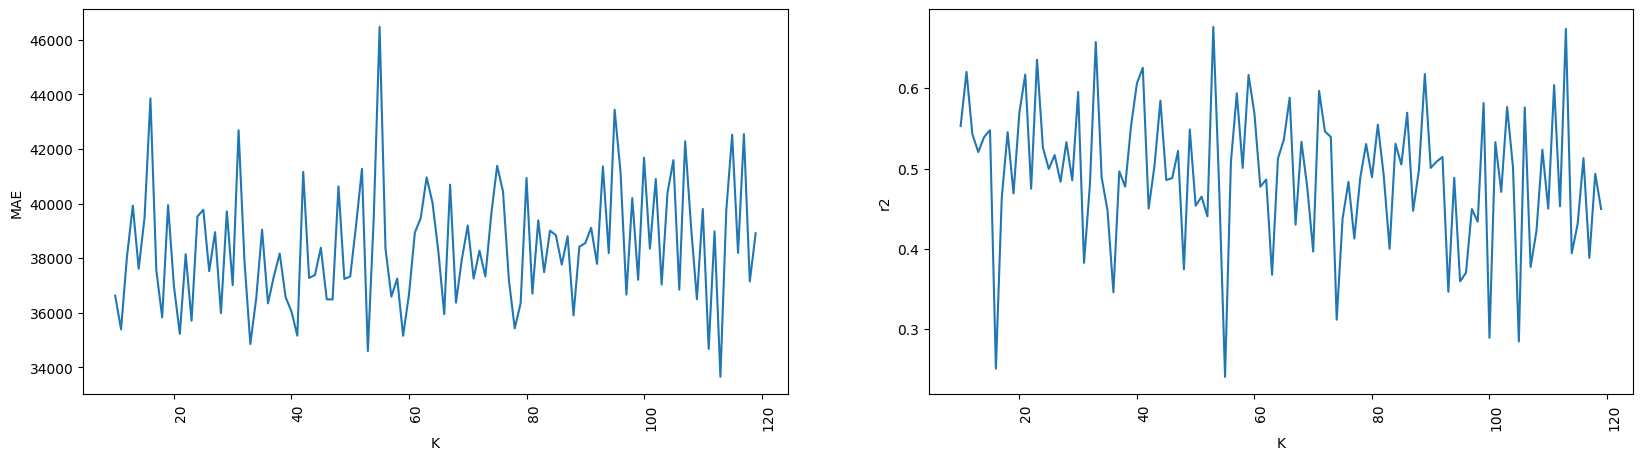

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [12]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass               5.410654e-05
LotFrontage              3.361824e-06
LotArea                  1.328717e-02
OverallQual              5.280132e-08
OverallCond              5.329786e-08
                             ...     
SaleCondition_Family     1.484516e-10
SaleCondition_Normal     2.527637e-09
SaleCondition_Partial    7.462514e-10
SaleCondition_nan        0.000000e+00
SalePrice                6.306789e+09
Length: 305, dtype: float64

In [13]:
varr.loc[varr > 0.1].index

Index(['SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['SalePrice'], dtype='object')

In [16]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,39350.551370,60474.944138,0.523199
1,101,42847.113014,66532.854666,0.422890
2,102,38111.845890,59580.914881,0.537192
3,103,42470.537671,64382.280141,0.459596
4,104,40182.931507,62813.131888,0.485616
...,...,...,...,...
395,495,42123.657534,61924.152970,0.500073
396,496,41467.760274,64882.811879,0.451160
397,497,41310.315068,61541.032497,0.506240
398,498,56752.902397,88334.143737,-0.017287


In [17]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
112,212,36389.407534,56458.895461,0.584424
62,162,36639.404110,53844.779213,0.622016
51,151,36671.815068,55687.415026,0.595703
106,206,36919.215753,55876.708781,0.592950
281,381,37602.253425,60174.779280,0.527920
...,...,...,...,...
373,473,47632.061644,74695.533578,0.272596
198,298,47667.592466,74369.854221,0.278926
87,187,48618.143836,75825.356859,0.250425
343,443,53650.835616,84060.412998,0.078768


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15276\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15276\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


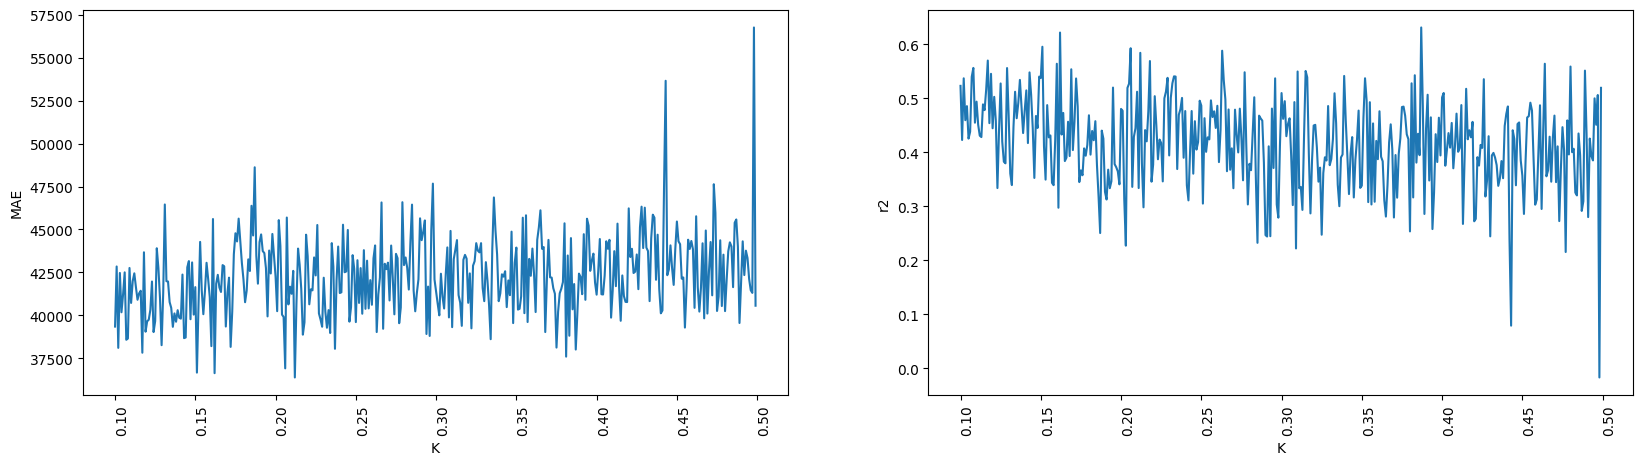

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


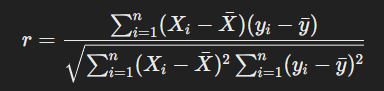

### Using numpy

In [19]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [20]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.03043261754890978


In [21]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15276\2326211799.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return up/down


[]

### Using sklearn

In [22]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['Neighborhood_NridgHt', 'ExterQual_Ex', 'ExterQual_Gd',
       'Foundation_PConc', 'BsmtQual_Ex', 'KitchenQual_Ex'], dtype=object)

In [23]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


,K,MAE,RMSE,r2
0,5,40318.150685,66250.138772,0.427784
1,6,39004.272260,63359.082031,0.476636
2,7,40795.804795,67183.612119,0.411546
3,8,37281.700342,59130.289601,0.544167
4,9,39009.537671,65285.220141,0.444331
...,...,...,...,...
110,115,43080.205479,72946.551911,0.306262
111,116,39662.126712,62247.266169,0.494843
112,117,39850.982877,60625.336972,0.520825
113,118,37197.746575,59108.207260,0.544507


In [24]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
46,51,33501.777397,58275.013614,0.557258
36,41,33524.616438,49686.951775,0.678137
18,23,33696.486301,48244.660774,0.696552
84,89,33726.037671,48643.050658,0.691519
86,91,34080.643836,54405.728542,0.614099
...,...,...,...,...
94,99,43383.537671,70395.382546,0.353938
85,90,43423.958904,69486.861206,0.370506
108,113,44219.876712,69482.485592,0.370585
53,58,44781.428082,69172.759695,0.376184


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15276\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15276\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


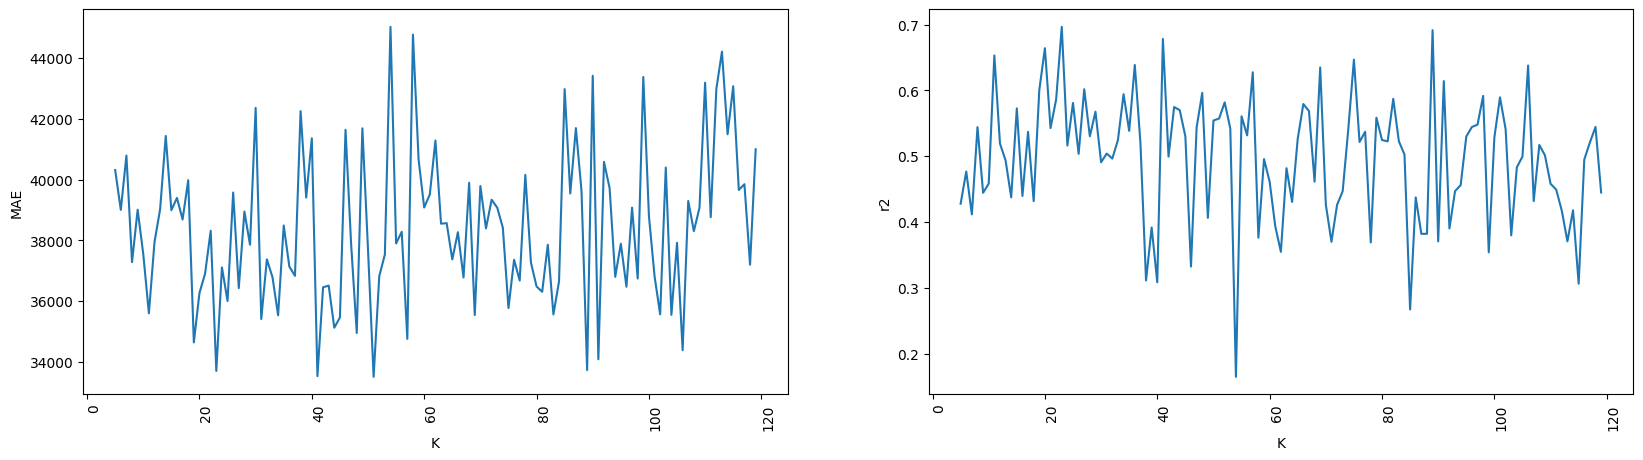

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

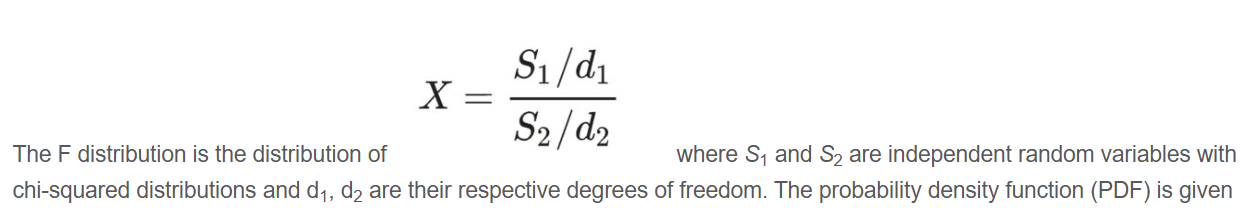

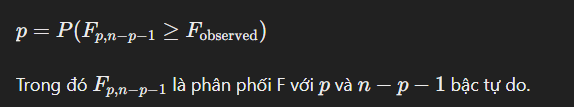

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

,K,MAE,RMSE,r2
0,5,37672.248288,52041.760654,0.646906
1,6,38678.400685,57241.304373,0.572826
2,7,36378.941781,51863.637787,0.649319
3,8,38656.349315,56938.627008,0.577331
4,9,40664.342466,59599.946513,0.536897
...,...,...,...,...
110,115,37853.335616,68010.834695,0.396965
111,116,40519.835616,63181.751616,0.479561
112,117,42462.458904,69146.387973,0.376660
113,118,35144.455479,59205.814478,0.543001


In [28]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
34,39,33036.297945,48270.912906,0.696221
62,67,33707.181507,48467.523603,0.693742
83,88,33786.849315,55900.090443,0.592609
88,93,34774.684932,56552.986496,0.583037
45,50,34780.705479,50821.393033,0.663272
...,...,...,...,...
24,29,43221.558219,64963.775328,0.449790
58,63,43413.969178,71674.159330,0.330252
6,11,43658.095890,68202.590154,0.393560
67,72,43726.804795,71396.090615,0.335439


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15276\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15276\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


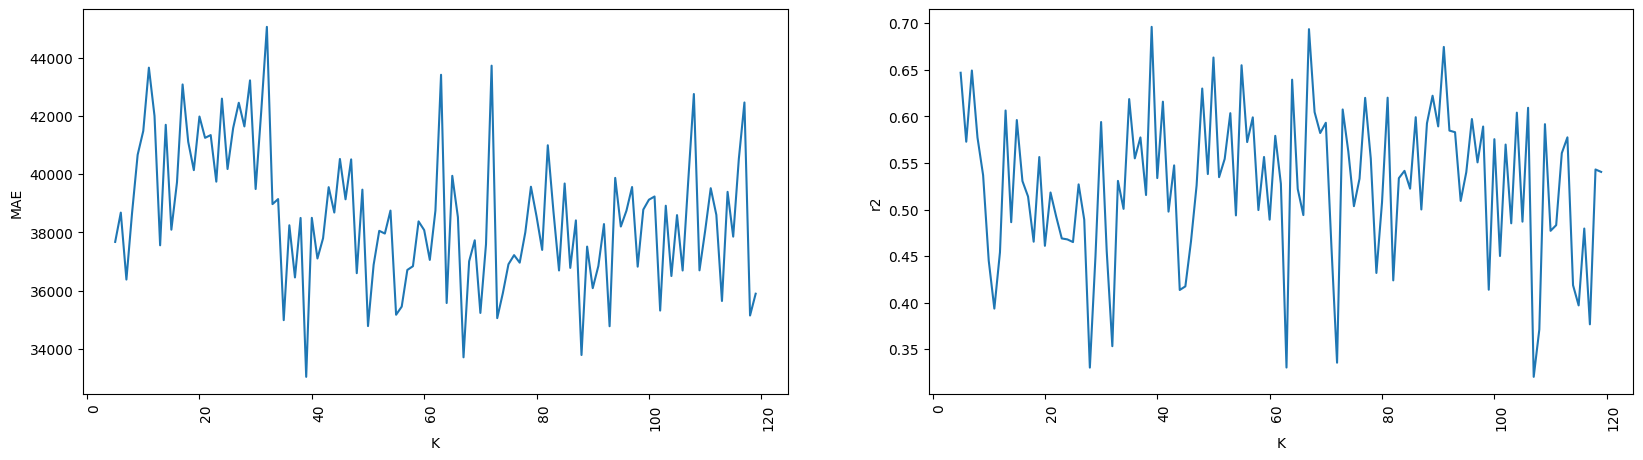

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

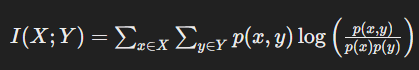

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

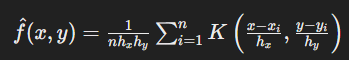

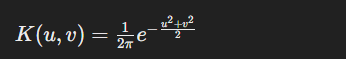

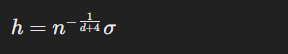

In [30]:
all_col=df.columns
all_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan',
       'SalePrice'],
      dtype='object', length=305)

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,5,42075.688356,63777.155519,0.469706
1,6,42986.417808,64811.399204,0.452368
2,7,42372.878425,64620.390337,0.455591
3,8,37958.958904,57665.184582,0.566476
4,9,41572.958904,64811.982319,0.452358
...,...,...,...,...
110,115,35502.952055,57420.802715,0.570142
111,116,37943.280822,63322.832494,0.477235
112,117,34776.284247,58769.126733,0.549718
113,118,37369.250000,65600.854549,0.438945


In [33]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [34]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
79,84,32486.743151,50371.942662,0.669201
87,92,33508.702055,53339.540900,0.629076
71,76,34143.061644,56095.698055,0.589753
96,101,34219.373288,52732.726308,0.637468
83,88,34272.260274,49916.990579,0.675150
...,...,...,...,...
73,78,43340.650685,69035.199020,0.378663
7,12,43705.845890,63896.048904,0.467727
55,60,44231.537671,70089.706754,0.359536
45,50,44363.373288,70347.671161,0.354813


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15276\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15276\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


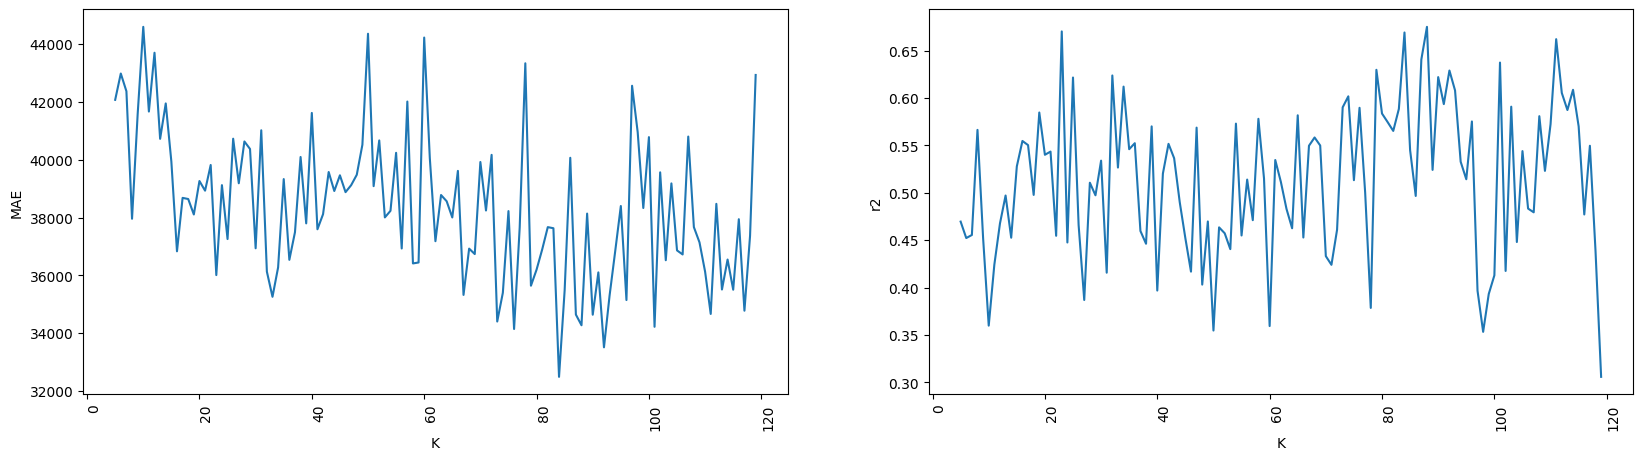

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [36]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,31560.575342,50068.250848,0.673178
1,6,37268.369863,63118.426673,0.480604
2,7,31834.030822,50089.586562,0.672900
3,8,33577.784247,52015.322304,0.647265
4,9,32562.397260,46754.415034,0.715009
...,...,...,...,...
110,115,33832.448630,55431.215287,0.599415
111,116,34311.726027,52722.370015,0.637610
112,117,34871.212329,59317.920420,0.541269
113,118,33505.989726,56583.617992,0.582585


In [37]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,29836.982877,46021.517796,0.723874
1,6,30975.407534,52537.408866,0.640148
2,7,28945.708904,42109.346665,0.768824
3,8,30102.448630,45378.980694,0.731530
4,9,29723.811644,48678.393565,0.691071
...,...,...,...,...
110,115,36689.190068,63031.086871,0.482041
111,116,32813.222603,50706.018896,0.664799
112,117,31002.445205,51795.635006,0.650238
113,118,33097.780822,52218.078533,0.644510


In [38]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,42075.688356,63777.155519,0.469706
1,6,42986.417808,64811.399204,0.452368
2,7,42372.878425,64620.390337,0.455591
3,8,37958.958904,57665.184582,0.566476
4,9,41572.958904,64811.982319,0.452358
...,...,...,...,...
110,115,35502.952055,57420.802715,0.570142
111,116,37943.280822,63322.832494,0.477235
112,117,34776.284247,58769.126733,0.549718
113,118,37369.250000,65600.854549,0.438945


In [39]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,31560.575342,50068.250848,0.673178,29836.982877,46021.517796,0.723874
1,6,37268.369863,63118.426673,0.480604,30975.407534,52537.408866,0.640148
2,7,31834.030822,50089.586562,0.672900,28945.708904,42109.346665,0.768824
3,8,33577.784247,52015.322304,0.647265,30102.448630,45378.980694,0.731530
4,9,32562.397260,46754.415034,0.715009,29723.811644,48678.393565,0.691071
...,...,...,...,...,...,...,...
110,115,33832.448630,55431.215287,0.599415,36689.190068,63031.086871,0.482041
111,116,34311.726027,52722.370015,0.637610,32813.222603,50706.018896,0.664799
112,117,34871.212329,59317.920420,0.541269,31002.445205,51795.635006,0.650238
113,118,33505.989726,56583.617992,0.582585,33097.780822,52218.078533,0.644510


In [40]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,31560.575342,50068.250848,0.673178,29836.982877,46021.517796,0.723874,42075.688356,63777.155519,0.469706
1,6,37268.369863,63118.426673,0.480604,30975.407534,52537.408866,0.640148,42986.417808,64811.399204,0.452368
2,7,31834.030822,50089.586562,0.672900,28945.708904,42109.346665,0.768824,42372.878425,64620.390337,0.455591
3,8,33577.784247,52015.322304,0.647265,30102.448630,45378.980694,0.731530,37958.958904,57665.184582,0.566476
4,9,32562.397260,46754.415034,0.715009,29723.811644,48678.393565,0.691071,41572.958904,64811.982319,0.452358
...,...,...,...,...,...,...,...,...,...,...
110,115,33832.448630,55431.215287,0.599415,36689.190068,63031.086871,0.482041,35502.952055,57420.802715,0.570142
111,116,34311.726027,52722.370015,0.637610,32813.222603,50706.018896,0.664799,37943.280822,63322.832494,0.477235
112,117,34871.212329,59317.920420,0.541269,31002.445205,51795.635006,0.650238,34776.284247,58769.126733,0.549718
113,118,33505.989726,56583.617992,0.582585,33097.780822,52218.078533,0.644510,37369.250000,65600.854549,0.438945


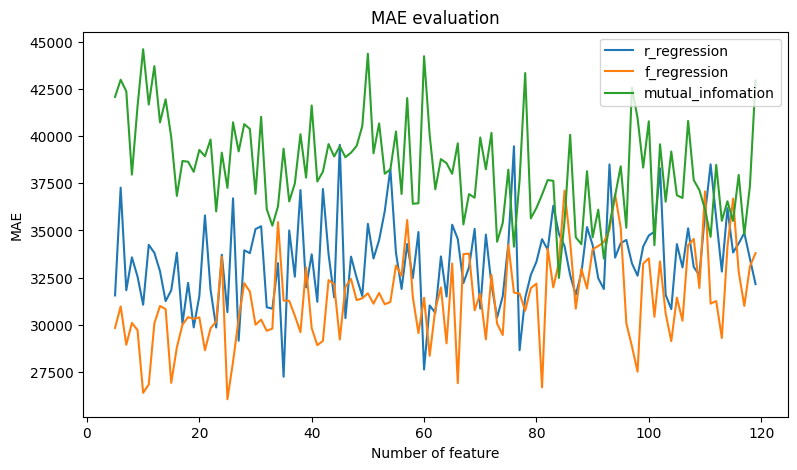

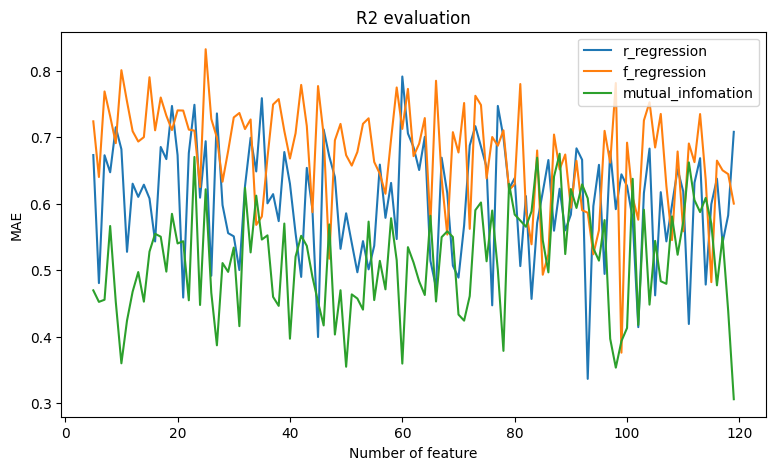

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()